In [1]:
import glob
import random
import base64
import pandas as pd
import numpy as np
from PIL import Image
from io import BytesIO
from IPython.display import HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import xlsxwriter
from scipy.optimize import curve_fit
from astropy import modeling
import os
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from scipy import interpolate
import scipy
from scipy.stats import pearsonr
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.linear_model import LinearRegression
import warnings
from mpl_toolkits.axes_grid1 import make_axes_locatable
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [16]:
data = pd.read_pickle('/Users/jiachenlu/Database/LESsimulations/all/data.pkl')
#data=data[data.Name!='m9'] # invalid
data=data[data.Name!='h1']
data=data[data.Name!='h2']
data=data[data.Name!='h3']
data=data[data.Name!='h4']
data=data[data.Name!='gH1']
#data=data[data.Name!='b1']
data=data[data.Classification!='VH-A-2.8']
data=data[data.Classification!='VH-S-2.8']
data=data[data.Classification!='VH-A-5.6']
data=data[data.Classification!='VH-S-5.6']
data.reset_index(drop=True, inplace=True)

In [17]:
data

,Name,Classification,lp,lf,w,c,gammaN,phi,gamma,A_avg [m],A_std [-],utau [m/s],utau* [m/s],d/Havg [-],z0/Havg [-],U/utau [-],u/utau [-],v/utau [-],U/u [-],ugrad,TKE/utau^2 [-],Duw/utau^2 [-],Tuw/utau^2 [-],Twc,Dwc,wc,Mom/utau^2 [-],vel/utau [-],vel/U [-],sgsR/utau^3 [-],sgsM/utau^3 [-],turbT/utau^3 [-],wakeT/utau^3 [-],presT/utau^3 [-],shearP/utau^3 [-],wakeP/utau^3 [-],formP/utau^3 [-],cdeq,Km,cklk,lece,cmu,pedvel/U [-],pedvel/utau [-],pedU/utau [-],pedTKE/utau^2 [-],pedUstd/utau [-],pedS,pedSmax,pedSstd,Ustd/utau [-]
0,CA0625,A-Idealized,0.062500,0.031250,96.000000,0.108253,96.000000,0.000000,0.7875,256.000000,0.000000,0.21105,0.206674,0.594430,0.022117,5.531050,5.395837,0.401580,1.025059,24.585566,3.866225,-0.054264,-0.514027,0.007147,0.001068,0.008214,-0.568291,5.395837,0.975554,-0.421429,-0.289472,0.398799,0.001999,-0.007279,0.135405,0.025460,-7.220109e-08,0.615582,0.553624,0.086456,1.736285,0.045390,0.950866,3.951322,4.155498,3.483613,1.557614,6.365445e-02,0.008218,0.000049,1.898596
1,CA1111,A-Idealized,0.111111,0.055556,64.000000,0.157135,64.000000,0.000000,0.7111,256.000000,0.000000,0.21105,0.205252,0.752689,0.027987,4.124443,3.943864,0.330880,1.045787,22.074427,3.707519,-0.138643,-0.448996,0.006918,0.001440,0.008359,-0.587639,3.943866,0.956218,-0.392405,-0.264151,0.323294,0.000958,-0.006191,0.110269,0.025400,4.291017e-09,0.685572,0.613355,0.099159,1.741916,0.052889,0.895008,2.618390,2.925551,3.373350,1.242783,6.421090e-02,0.008197,0.000022,1.736382
2,CA1600,A-Idealized,0.160000,0.080000,48.000000,0.195959,48.000000,0.000000,0.6480,256.000000,0.000000,0.21105,0.205734,0.823715,0.026654,3.417989,3.209493,0.252350,1.064962,21.488642,3.750690,-0.142599,-0.411927,0.006474,0.001886,0.008360,-0.554526,3.209496,0.939001,-0.404811,-0.256105,0.292096,0.003510,-0.004243,0.104319,0.028739,-2.239992e-08,0.685807,0.553459,0.089532,1.810908,0.047335,0.811330,1.873455,2.309117,3.504708,0.979756,6.422630e-02,0.008218,0.000023,1.642493
3,CA2500,A-Idealized,0.250000,0.125000,32.000000,0.250000,32.000000,0.000000,0.5500,256.000000,0.000000,0.21105,0.206499,0.937902,0.016662,2.855831,2.603354,0.169368,1.096981,21.782246,3.711183,-0.048255,-0.374070,0.006344,0.001987,0.008332,-0.422325,2.603407,0.911611,-0.430477,-0.266022,0.282833,0.007161,-0.004643,0.103088,0.027730,-2.572340e-09,0.587675,0.368176,0.059777,1.717555,0.035931,0.704669,1.199613,1.702378,3.458963,0.742629,6.427157e-02,0.008225,0.000018,1.547550
4,CA3500,A-Idealized,0.351166,0.175583,22.000000,0.291171,22.000000,0.000000,0.4557,256.000000,0.000000,0.21105,0.210651,0.923447,0.017788,2.266509,2.009946,0.154674,1.127647,18.362900,3.188601,0.049433,-0.346236,0.006659,0.001557,0.008216,-0.296803,2.009951,0.886805,-0.415298,-0.244806,0.285211,0.005255,-0.009269,0.094205,0.019034,-7.109661e-09,0.588630,0.272859,0.045292,1.495433,0.031657,0.709801,0.902228,1.271099,2.664143,0.576850,6.310405e-02,0.008204,0.000015,1.281745
5,CA4444,A-Idealized,0.444444,0.222222,16.000000,0.314270,16.000000,0.000000,0.3778,256.000000,0.000000,0.21105,0.218233,0.952827,0.014675,2.224810,1.952458,0.182783,1.139492,14.969581,2.659276,0.091855,-0.330565,0.006960,0.000953,0.007913,-0.238710,1.952462,0.877586,-0.421009,-0.236820,0.288343,0.002724,-0.014697,0.083307,0.015525,5.724701e-09,0.428772,0.247960,0.042911,1.188015,0.038006,0.828322,1.138837,1.374872,1.984897,0.733887,6.349269e-02,0.008244,0.000023,1.318854
6,CA6400,A-Idealized,0.640000,0.320000,8.000000,0.320000,8.000000,0.000000,0.2320,256.000000,0.000000,0.21105,0.232373,1.055580,0.001537,3.017595,2.825980,0.179462,1.067805,16.973557,1.774559,-0.111065,-0.285113,0.007528,0.001194,0.008722,-0.396178,2.825981,0.936501,-0.528304,-0.333002,0.432019,0.005372,-0.026183,0.077681,0.005774,6.032892e-10,0.093469,0.503378,0.130476,0.487961,0.255858,0.933077,2.210714,2.369273,0.935001,1.741095,6.475943e-02,0.008753,0.000120,2.308369
7,CS0625,S-Idealized,0.062500,0.031250,275.200000,0.062500,224.000000,0.000000,0.7188,256.000000,0.000000,0.21105,0.206674,0.5062

In [22]:
def scatterAll(xv,yv,ax):
    s = 60
    width = 3
    
    try: 
        tmp=data[data.Classification=='A-Idealized']
        sns.scatterplot(data=tmp,x=xv,y=yv,ax=ax,color='r',marker='s',s=s,linewidths=width)
        tmp=data[data.Classification=='S-Idealized']
        sns.scatterplot(data=tmp,x=xv,y=yv,ax=ax,color='k',marker='s',s=s,linewidths=width)
    except:
        pass

    try:
        tmp=data[data.Classification=='VH-A-2.8']
        sns.scatterplot(data=tmp,x=xv,y=yv,ax=ax,color='r',marker='v',s=s,linewidths=width)
        tmp=data[data.Classification=='VH-S-2.8']
        sns.scatterplot(data=tmp,x=xv,y=yv,ax=ax,color='k',marker='v',s=s,linewidths=width)
    except:
        pass
    
    try:
        tmp=data[data.Classification=='VH-A-5.6']
        sns.scatterplot(data=tmp,x=xv,y=yv,ax=ax,color='r',marker='^',s=s,linewidths=width)
        tmp=data[data.Classification=='VH-S-5.6']
        sns.scatterplot(data=tmp,x=xv,y=yv,ax=ax,color='k',marker='^',s=s,linewidths=width)
    except:
        pass
    
    try:
        tmp=data[data.Classification=='realistic-16']
        sns.scatterplot(data=tmp,x=xv,y=yv,ax=ax,color='g',marker='o',s=s)
    except:
        pass


In [23]:
def showFitting(x,y,color,ax):
    def objective(x,a,b):
        return a*x**b

    x = x
    y = y
    popt, _ = curve_fit(objective, x, y)
    a, b = popt
    #print(popt)
    # plot input vs output
    #plt.scatter(x, y)
    # define a sequence of inputs between the smallest and largest known inputs
    x_line = np.linspace(0, x.max(), 100)
    # calculate the output for the range
    y_line = objective(x_line, a, b)
    ax.plot(x_line, y_line, '-', color=color,label='fit')
    return(a,b)

In [24]:
data

,Name,Classification,lp,lf,w,c,gammaN,phi,gamma,A_avg [m],A_std [-],utau [m/s],utau* [m/s],d/Havg [-],z0/Havg [-],U/utau [-],u/utau [-],v/utau [-],U/u [-],ugrad,TKE/utau^2 [-],Duw/utau^2 [-],Tuw/utau^2 [-],Twc,Dwc,wc,Mom/utau^2 [-],vel/utau [-],vel/U [-],sgsR/utau^3 [-],sgsM/utau^3 [-],turbT/utau^3 [-],wakeT/utau^3 [-],presT/utau^3 [-],shearP/utau^3 [-],wakeP/utau^3 [-],formP/utau^3 [-],cdeq,Km,cklk,lece,cmu,pedvel/U [-],pedvel/utau [-],pedU/utau [-],pedTKE/utau^2 [-],pedUstd/utau [-],pedS,pedSmax,pedSstd,Ustd/utau [-]
0,CA0625,A-Idealized,0.062500,0.031250,96.000000,0.108253,96.000000,0.000000,0.7875,256.000000,0.000000,0.21105,0.206674,0.594430,0.022117,5.531050,5.395837,0.401580,1.025059,24.585566,3.866225,-0.054264,-0.514027,0.007147,0.001068,0.008214,-0.568291,5.395837,0.975554,-0.421429,-0.289472,0.398799,0.001999,-0.007279,0.135405,0.025460,-7.220109e-08,0.615582,0.553624,0.086456,1.736285,0.045390,0.950866,3.951322,4.155498,3.483613,1.557614,6.365445e-02,0.008218,0.000049,1.898596
1,CA1111,A-Idealized,0.111111,0.055556,64.000000,0.157135,64.000000,0.000000,0.7111,256.000000,0.000000,0.21105,0.205252,0.752689,0.027987,4.124443,3.943864,0.330880,1.045787,22.074427,3.707519,-0.138643,-0.448996,0.006918,0.001440,0.008359,-0.587639,3.943866,0.956218,-0.392405,-0.264151,0.323294,0.000958,-0.006191,0.110269,0.025400,4.291017e-09,0.685572,0.613355,0.099159,1.741916,0.052889,0.895008,2.618390,2.925551,3.373350,1.242783,6.421090e-02,0.008197,0.000022,1.736382
2,CA1600,A-Idealized,0.160000,0.080000,48.000000,0.195959,48.000000,0.000000,0.6480,256.000000,0.000000,0.21105,0.205734,0.823715,0.026654,3.417989,3.209493,0.252350,1.064962,21.488642,3.750690,-0.142599,-0.411927,0.006474,0.001886,0.008360,-0.554526,3.209496,0.939001,-0.404811,-0.256105,0.292096,0.003510,-0.004243,0.104319,0.028739,-2.239992e-08,0.685807,0.553459,0.089532,1.810908,0.047335,0.811330,1.873455,2.309117,3.504708,0.979756,6.422630e-02,0.008218,0.000023,1.642493
3,CA2500,A-Idealized,0.250000,0.125000,32.000000,0.250000,32.000000,0.000000,0.5500,256.000000,0.000000,0.21105,0.206499,0.937902,0.016662,2.855831,2.603354,0.169368,1.096981,21.782246,3.711183,-0.048255,-0.374070,0.006344,0.001987,0.008332,-0.422325,2.603407,0.911611,-0.430477,-0.266022,0.282833,0.007161,-0.004643,0.103088,0.027730,-2.572340e-09,0.587675,0.368176,0.059777,1.717555,0.035931,0.704669,1.199613,1.702378,3.458963,0.742629,6.427157e-02,0.008225,0.000018,1.547550
4,CA3500,A-Idealized,0.351166,0.175583,22.000000,0.291171,22.000000,0.000000,0.4557,256.000000,0.000000,0.21105,0.210651,0.923447,0.017788,2.266509,2.009946,0.154674,1.127647,18.362900,3.188601,0.049433,-0.346236,0.006659,0.001557,0.008216,-0.296803,2.009951,0.886805,-0.415298,-0.244806,0.285211,0.005255,-0.009269,0.094205,0.019034,-7.109661e-09,0.588630,0.272859,0.045292,1.495433,0.031657,0.709801,0.902228,1.271099,2.664143,0.576850,6.310405e-02,0.008204,0.000015,1.281745
5,CA4444,A-Idealized,0.444444,0.222222,16.000000,0.314270,16.000000,0.000000,0.3778,256.000000,0.000000,0.21105,0.218233,0.952827,0.014675,2.224810,1.952458,0.182783,1.139492,14.969581,2.659276,0.091855,-0.330565,0.006960,0.000953,0.007913,-0.238710,1.952462,0.877586,-0.421009,-0.236820,0.288343,0.002724,-0.014697,0.083307,0.015525,5.724701e-09,0.428772,0.247960,0.042911,1.188015,0.038006,0.828322,1.138837,1.374872,1.984897,0.733887,6.349269e-02,0.008244,0.000023,1.318854
6,CA6400,A-Idealized,0.640000,0.320000,8.000000,0.320000,8.000000,0.000000,0.2320,256.000000,0.000000,0.21105,0.232373,1.055580,0.001537,3.017595,2.825980,0.179462,1.067805,16.973557,1.774559,-0.111065,-0.285113,0.007528,0.001194,0.008722,-0.396178,2.825981,0.936501,-0.528304,-0.333002,0.432019,0.005372,-0.026183,0.077681,0.005774,6.032892e-10,0.093469,0.503378,0.130476,0.487961,0.255858,0.933077,2.210714,2.369273,0.935001,1.741095,6.475943e-02,0.008753,0.000120,2.308369
7,CS0625,S-Idealized,0.062500,0.031250,275.200000,0.062500,224.000000,0.000000,0.7188,256.000000,0.000000,0.21105,0.206674,0.5062

-0.8765820398529693 0.9008398178979845


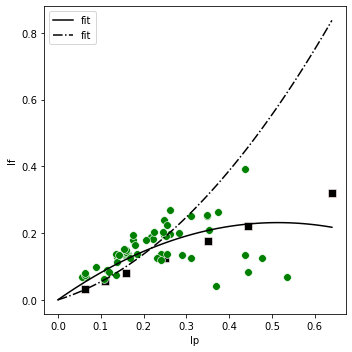

In [25]:
def objective(x,a,b):
    return a*x**2+b*x

x = data.lp
y = data.lf

popt, _ = curve_fit(objective, x, y)
a, b = popt
#print(popt)
# plot input vs output
#plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.linspace(0, x.max(), 100)
# calculate the output for the range
y_line = objective(x_line, a, b)

fig, ax1 = plt.subplots(figsize=(5,5))

plt.plot(x_line, y_line, '-', color='k',label='fit')
plt.plot(x_line, 1.42*x_line**2+0.4*x_line, '-.', color='k',label='fit')


scatterAll('lp','lf',ax1)
#plt.xlabel('')

print(a,b)

plt.tight_layout()
plt.savefig('lplf.png',dpi=300)

-1.4068056516595058 1.0561223719970487


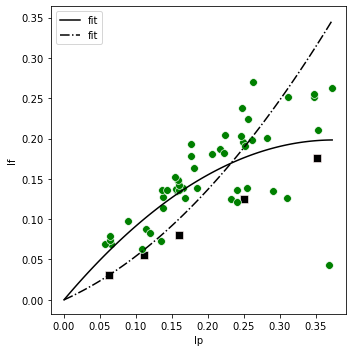

In [26]:
# Exclude every case with lp > 0.4
data=data[data.lp<=0.4]
def objective(x,a,b):
    return a*x**2+b*x

x = data.lp
y = data.lf

popt, _ = curve_fit(objective, x, y)
a, b = popt
#print(popt)
# plot input vs output
#plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.linspace(0, x.max(), 100)
# calculate the output for the range
y_line = objective(x_line, a, b)

fig, ax1 = plt.subplots(figsize=(5,5))

plt.plot(x_line, y_line, '-', color='k',label='fit')
plt.plot(x_line, 1.42*x_line**2+0.4*x_line, '-.', color='k',label='fit')


scatterAll('lp','lf',ax1)
#plt.xlabel('')

print(a,b)


lpa = a 
lpb = b
plt.tight_layout()
plt.savefig('lplf.png',dpi=300)

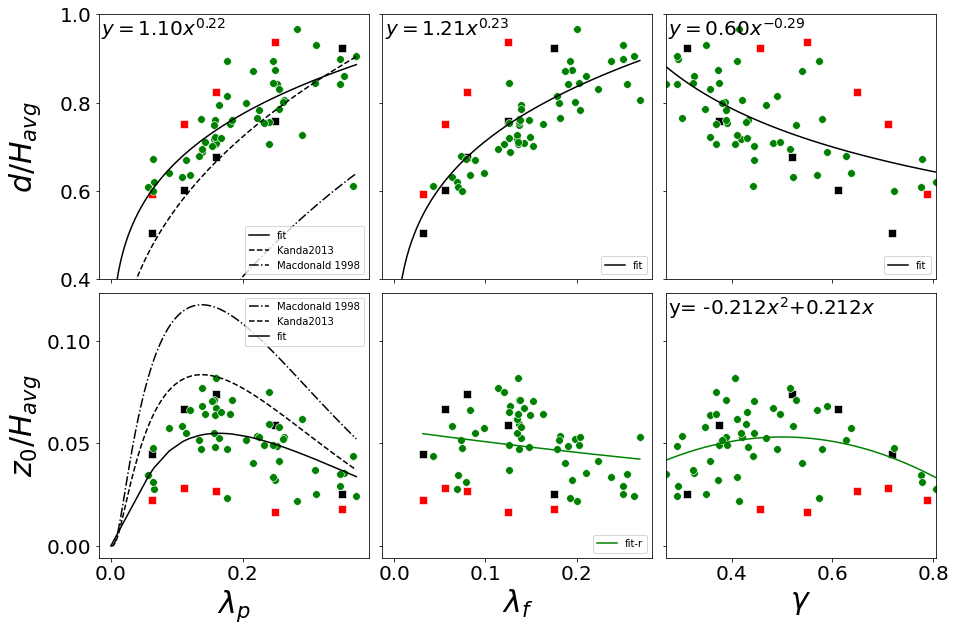

In [82]:
# higher range - lower roughness length

xv = np.array(['lp','lf','gamma'])
yv = np.array(['d/Havg [-]','z0/Havg [-]'])
xvName = np.array(['$\lambda_p$','$\lambda_f$','$\gamma$'])
yvName = np.array(['$d/H_{avg}$','$z_0/H_{avg}$'])

c0 = -0.17
b0 = 0.36
a0 = 1.29
a1 = 0.71
b1 = 20.21
c1 = -0.77
A = 4.43
beta = 1.0
Clb = 1.2
kappa = 0.4
Hstd = 0
Havg = 16
Hmax = 16
X = (Hstd+Havg)/Hmax



fig, ax = plt.subplots(figsize=(xv.size*5,yv.size*5),ncols=xv.size,nrows=yv.size,sharey='row',sharex='col')
fig.subplots_adjust(wspace=0.05, hspace=0.05)
for i in range(xv.size):
    for j in range(yv.size):
        scatterAll(xv[i],yv[j],ax[j,i])

        if xv[i] == 'lp' and yv[j] == 'd/Havg [-]':
            x = np.array(data[xv[i]])
            y = np.array(data[yv[j]])
            
            [a,b] = showFitting(x,y,'k',ax[j,i])
            labell = '$y= %1.2fx^{%1.2f}$' % (a,b)
            ax[j,i].annotate(labell,xy=(0.01, 0.92), xycoords='axes fraction',fontsize=20)
            
            
            xx = np.linspace(0,x.max(),100)
            ax[j,i].plot(xx,c0*X**2+(a0*xx**b0-c0)*X,'--',c='k',label='Kanda2013')
            ax[j,i].plot(xx,(1+A**(-xx)*(xx-1)),'-.',c='k',label='Macdonald 1998')
            ax[j,i].legend(loc='lower right')
            ax[j,i].set_ylim(0.4,1.0)
            
        if xv[i] == 'lf' and yv[j] == 'd/Havg [-]':
            x = np.array(data[xv[i]])
            y = np.array(data[yv[j]])
            
            [a,b] = showFitting(x,y,'k',ax[j,i])
            labell = '$y= %1.2fx^{%1.2f}$' % (a,b)
            ax[j,i].annotate(labell,xy=(0.01, 0.92), xycoords='axes fraction',fontsize=20)
            ax[j,i].legend(loc='lower right')
            ax[j,i].set_ylim(0.4,1.0)
            
        if xv[i] == 'gamma' and yv[j] == 'd/Havg [-]':
            x = np.array(data[xv[i]])
            y = np.array(data[yv[j]])
            
            [a,b] = showFitting(x,y,'k',ax[j,i])
            labell = '$y= %1.2fx^{%1.2f}$' % (a,b)
            ax[j,i].annotate(labell,xy=(0.01, 0.92), xycoords='axes fraction',fontsize=20)
            ax[j,i].legend(loc='lower right')
            ax[j,i].set_ylim(0.4,1.0)
            
        if xv[i] == 'lf' and yv[j] == 'z0/Havg [-]':
            x = np.array(data[xv[i]])
            y = np.array(data[yv[j]])
            def objective(x,a,b):
                return a*np.exp(b*x)
                #return a*x + b
            
            popt, _ = curve_fit(objective, x, y)
            xx = np.linspace(x.min(),x.max(),100)
            bb = popt[0]*np.exp(popt[1]*xx)
            #bb = popt[0]*xx + popt[1]
            ax[j,i].plot(xx,bb,c='g',label='fit-r') 
            #[a,b] = showFitting(x,y,'k',ax[j,i])
            #labell = '$y= %1.2fx^{%1.2f}$' % (a,b)
            #ax[j,i].annotate(labell,xy=(0.01, 0.92), xycoords='axes fraction',fontsize=20)
            ax[j,i].legend(loc='lower right')
           
            
        

        
        if xv[i] == 'lp' and yv[j] == 'z0/Havg [-]':
            x = np.array(data[xv[i]])
            y = np.array(data[yv[j]])
            
            xx = np.linspace(0,x.max(),100)
            lf = lpa*xx**2 + lpb*xx # fitting from LES-current   
            Md = (1+A**(-xx)*(xx-1))
            
            Mz0 = ((1 - Md)*np.exp(-(0.5*beta*Clb/kappa**2*(1 - Md)*lf)**(-0.5)))
            ax[j,i].plot(xx,Mz0,'-.',c='k',label='Macdonald 1998')
            
            
            Y = xx*Hstd/Havg
            Kz0 = Mz0*(b1*Y**2+c1*Y+a1)
            ax[j,i].plot(xx,Kz0,'--',c='k',label='Kanda2013')
            
            
            Mz0*(b1*Y**2+c1*Y+a1)
            
            def objective(x,a):
                return a*x
            
            xxx = np.sort(x)
            lf = -1.411*xxx**2 + 1.0587*xxx # fitting from LES-current
            tmpd = 1.05*xxx**0.20
            tmpz0 = ((1 - tmpd)*np.exp(-(0.5*beta*Clb/kappa**2*(1 - tmpd)*lf)**(-0.5)))
            
            popt, _ = curve_fit(objective, tmpz0, y)
            xxx = np.concatenate((np.array([0]),xxx),axis=0)
            tmpz0 = np.concatenate((np.array([0]),tmpz0),axis=0)
            ax[j,i].plot(xxx,tmpz0*popt[0],c='k',label='fit')  
            ax[j,i].legend(loc='upper right')

            
        if xv[i] == 'gamma' and yv[j] == 'z0/Havg [-]': 
            x = np.array(data[xv[i]])
            y = np.array(data[yv[j]])
            
            def objective(x,a):
                return a*x**2-a*x
            popt, _ = curve_fit(objective, x, y)
            xx = np.linspace(0,x.max(),1000)
            bb = popt*xx**2-popt*xx
            ax[j,i].plot(xx,bb,c='g',label='fit-r')
            
            labell = 'y= %1.3f$x^2$+%1.3f$x$' % (popt,-popt)
            ax[j,i].annotate(labell,xy=(0.01, 0.92), xycoords='axes fraction',fontsize=20)
        
   
        if xv[i] == 'gamma':
            x = np.array(data[xv[i]])
            ax[j,i].set_xlim(x.min(),x.max())

        ax[j,i].locator_params(axis='x', nbins=4)
        ax[j,i].locator_params(axis='y', nbins=4)    
        ax[j,i].tick_params(axis='both', which='major', labelsize=20)    
        ax[j,i].set(ylabel=None)
        ax[j,i].set(xlabel=None)
        #ax[j,i].grid('on')
        
for j in range(np.size(yv)):
    ax[j,0].set_ylabel(yvName[j],fontsize=30)
    #ax[j,4].set_xlim(0,100)
    #ax[j,2].set_xlim(0,100)
    
for i in range(np.size(xv)):
    ax[-1,i].set_xlabel(xvName[i],fontsize=30)
    
    
fig.align_labels()
#plt.tight_layout()
plt.savefig('AeroFit.png')

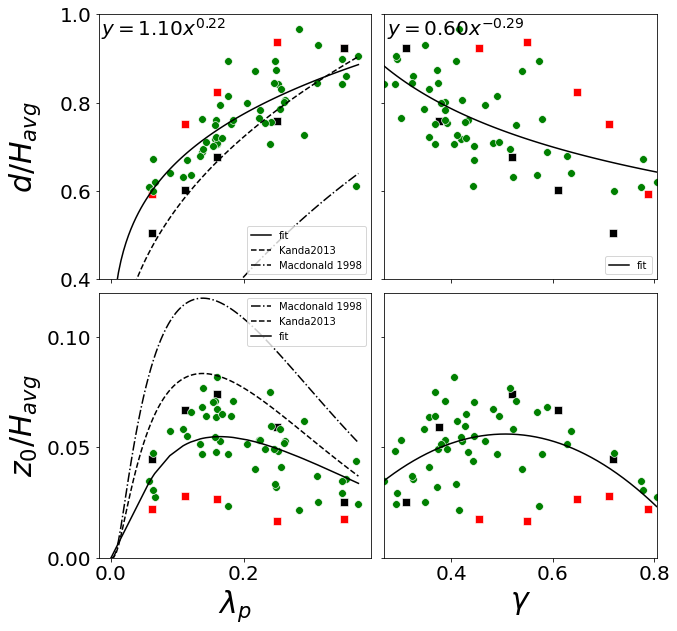

In [81]:
# higher range - lower roughness length

xv = np.array(['lp','gamma'])
yv = np.array(['d/Havg [-]','z0/Havg [-]'])
xvName = np.array(['$\lambda_p$','$\gamma$'])
yvName = np.array(['$d/H_{avg}$','$z_0/H_{avg}$'])

c0 = -0.17
b0 = 0.36
a0 = 1.29
a1 = 0.71
b1 = 20.21
c1 = -0.77
A = 4.43
beta = 1.0
Clb = 1.2
kappa = 0.4
Hstd = 0
Havg = 16
Hmax = 16
X = (Hstd+Havg)/Hmax



fig, ax = plt.subplots(figsize=(xv.size*5,yv.size*5),ncols=xv.size,nrows=yv.size,sharey='row',sharex='col')
fig.subplots_adjust(wspace=0.05, hspace=0.05)
for i in range(xv.size):
    for j in range(yv.size):
        scatterAll(xv[i],yv[j],ax[j,i])

        if xv[i] == 'lp' and yv[j] == 'd/Havg [-]':
            x = np.array(data[xv[i]])
            y = np.array(data[yv[j]])
            
            [a,b] = showFitting(x,y,'k',ax[j,i])
            labell = '$y= %1.2fx^{%1.2f}$' % (a,b)
            ax[j,i].annotate(labell,xy=(0.01, 0.92), xycoords='axes fraction',fontsize=20)
            
            
            xx = np.linspace(0,x.max(),100)
            ax[j,i].plot(xx,c0*X**2+(a0*xx**b0-c0)*X,'--',c='k',label='Kanda2013')
            ax[j,i].plot(xx,(1+A**(-xx)*(xx-1)),'-.',c='k',label='Macdonald 1998')
            ax[j,i].legend(loc='lower right')
            ax[j,i].set_ylim(0.4,1.0)
        if xv[i] == 'lp' and yv[j] == 'z0/Havg [-]':
            x = np.array(data[xv[i]])
            y = np.array(data[yv[j]])
            
            xx = np.linspace(0,x.max(),100)
            lf = lpa*xx**2 + lpb*xx # fitting from LES-current   
            Md = (1+A**(-xx)*(xx-1))
            
            Mz0 = ((1 - Md)*np.exp(-(0.5*beta*Clb/kappa**2*(1 - Md)*lf)**(-0.5)))
            ax[j,i].plot(xx,Mz0,'-.',c='k',label='Macdonald 1998')
            
            Y = xx*Hstd/Havg
            Kz0 = Mz0*(b1*Y**2+c1*Y+a1)
            ax[j,i].plot(xx,Kz0,'--',c='k',label='Kanda2013')
            
            
            Mz0*(b1*Y**2+c1*Y+a1)
            
            def objective(x,a):
                return a*x
            
            xxx = np.sort(x)
            lf = -1.411*xxx**22 + 1.0587*xxx # fitting from LES-current
            tmpd = 1.05*xxx**0.20
            
            tmpz0 = ((1 - tmpd)*np.exp(-(0.5*beta*Clb/kappa**2*(1 - tmpd)*lf)**(-0.5)))
            
            popt, _ = curve_fit(objective, tmpz0, y)
            xxx = np.concatenate((np.array([0]),xxx),axis=0)
            tmpz0 = np.concatenate((np.array([0]),tmpz0),axis=0)
            ax[j,i].plot(xxx,tmpz0*popt[0],c='k',label='fit')  
            ax[j,i].legend(loc='upper right')
            
            
            
            
        if xv[i] == 'gamma' and yv[j] == 'd/Havg [-]':
            x = np.array(data[xv[i]])
            y = np.array(data[yv[j]])
            
            [a,b] = showFitting(x,y,'k',ax[j,i])
            labell = '$y= %1.2fx^{%1.2f}$' % (a,b)
            ax[j,i].annotate(labell,xy=(0.01, 0.92), xycoords='axes fraction',fontsize=20)
            ax[j,i].legend(loc='lower right')
            ax[j,i].set_ylim(0.4,1.0)
            
            
            
        if xv[i] == 'gamma' and yv[j] == 'z0/Havg [-]': 
            x = np.array(data[xv[i]])
            y = np.array(data[yv[j]])
            
            #tmpd = 0.6*x**(-0.29)
            #x = (1 - tmpd)
            def objective(x,a,b,c):
                return a*x**2 + b*x + c
            
            #def objective(x,a,b):
            #    return a*x*np.exp(b*x**(-0.5))
            
            popt, _ = curve_fit(objective, x, y)
            xx = np.linspace(0,x.max(),1000)
            bb = objective(xx,popt[0],popt[1],popt[2])
            ax[j,i].plot(xx,bb,c='k',label='fit-r')
            
            
            
            #labell = 'y= %1.3f$x^2$+%1.3f$x$' % (popt,-popt)
            #ax[j,i].annotate(labell,xy=(0.01, 0.92), xycoords='axes fraction',fontsize=20)
            ax[j,i].set_ylim(0,0.12)
   
        if xv[i] == 'gamma':
            x = np.array(data[xv[i]])
            ax[j,i].set_xlim(x.min(),x.max())

        ax[j,i].locator_params(axis='x', nbins=4)
        ax[j,i].locator_params(axis='y', nbins=4)    
        ax[j,i].tick_params(axis='both', which='major', labelsize=20)    
        ax[j,i].set(ylabel=None)
        ax[j,i].set(xlabel=None)
        #ax[j,i].grid('on')
        
for j in range(np.size(yv)):
    ax[j,0].set_ylabel(yvName[j],fontsize=30)
    #ax[j,4].set_xlim(0,100)
    #ax[j,2].set_xlim(0,100)
    
for i in range(np.size(xv)):
    ax[-1,i].set_xlabel(xvName[i],fontsize=30)
    
    
    
fig.align_labels()
#plt.tight_layout()
plt.savefig('AeroFit.png')

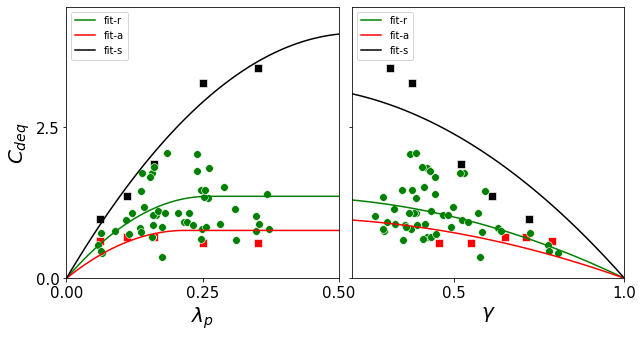

In [78]:


xv = np.array(['lp','gamma'])
yv = np.array(['cdeq'])
xvName = np.array(['$\lambda_p$','$\gamma$'])
yvName = '$C_{deq}$'

fig, ax = plt.subplots(figsize=(10,5),ncols=2,nrows=1,sharey='row',sharex='col')
fig.subplots_adjust(wspace=0.05, hspace=0.05)

for i in range(xv.size):
    for j in range(yv.size):
        scatterAll(xv[i],yv[j],ax[i])
        if xv[i] == 'lp' and yv[j] == 'cdeq':
            #aa = np.array([0,0.314950585365295,0.439406543970108,0.628341615200043,1.147062182426453,1.442283630371094,1.589315652847290])
            #aa = aa*1.225*2
            #xx = np.linspace(0,0.5,1000)
            #bb = -10.8*xx**2+13.3*xx
            #bb[bb>3.77] = 3.77
            #ax[i].plot(xx,bb,c='k',label='NN20')
            
            
            datatmp=data[data.Classification!='S-Idealized']
            datatmp=datatmp[datatmp.Classification!='A-Idealized']
            
            x = data[xv[i]]
            x = np.concatenate((np.array([0]),x),axis=0)
            y = data[yv[j]]
            y = np.concatenate((np.array([0]),y),axis=0)
            
            def objective(x,a,b):
                
                return a*x**2+b*x
            
            popt, _ = curve_fit(objective, x, y)
            bb = popt[0]*xx**2+xx*popt[1]
            bb[np.where(bb==bb.max())[0][0]:]=bb.max()
            ax[i].plot(xx,bb,c='g',label='fit-r') 
            
                        
            def objective(x,a,b):
                #return a*np.exp(b*x)
                return a*x**2 + b*x
            
            datatmp = data[data.Classification=='A-Idealized']
            x = datatmp[xv[i]]
            #x = np.concatenate((np.array([0]),x),axis=0)
            y = datatmp[yv[j]]
            #y = np.concatenate((np.array([0]),y),axis=0)
            popt, _ = curve_fit(objective, x, y)
            bb = popt[0]*xx**2 + popt[1]*xx
            bb[np.where(bb==bb.max())[0][0]:]=bb.max()
            ax[i].plot(xx,bb,c='r',label='fit-a') 
            
            
            datatmp = data[data.Classification=='S-Idealized']
            x = datatmp[xv[i]]
            #x = np.concatenate((np.array([0]),x),axis=0)
            y = datatmp[yv[j]]
            #y = np.concatenate((np.array([0]),y),axis=0)
            popt, _ = curve_fit(objective, x, y)
            bb = popt[0]*xx**2 + popt[1]*xx
            bb[np.where(bb==bb.max())[0][0]:]=bb.max()
            ax[i].plot(xx,bb,c='k',label='fit-s')
            
            
            

            ax[i].legend(loc='upper left')
            
            
        if xv[i] == 'gamma' and yv[j] == 'cdeq':
            
            datatmp=data[data.Classification!='S-Idealized']
            datatmp=datatmp[datatmp.Classification!='A-Idealized']
            x = datatmp[xv[i]]
            x = np.concatenate((np.array([0]),x),axis=0)
            y = datatmp[yv[j]]
            y = np.concatenate((np.array([0]),y),axis=0)
            
            def objective(x,a):
                #return a*np.exp(b*x)
                #return a*x**2 + b*x
                return a*x**2 - a
                #return a*np.exp(x) - a*np.exp(-x)
            
            popt, _ = curve_fit(objective, x, y)
            xx = np.linspace(x.min(),1,100)
            
            #bb = popt[0]*np.exp(popt[1]*xx)
            #bb = popt*np.exp(xx)-popt*np.exp(-xx)
            bb = objective(xx,popt)
            
            
            ax[i].plot(xx,bb,c='g',label='fit-r')
            
            
            datatmp = data[data.Classification=='A-Idealized']
            x = datatmp[xv[i]]
            #x = np.concatenate((np.array([0]),x),axis=0)
            y = datatmp[yv[j]]
            #y = np.concatenate((np.array([0]),y),axis=0)
            popt, _ = curve_fit(objective, x, y)
            

            bb = objective(xx,popt)
            ax[i].plot(xx,bb,c='r',label='fit-a') 
            
            datatmp = data[data.Classification=='S-Idealized']
            x = datatmp[xv[i]]
            #x = np.concatenate((np.array([0]),x),axis=0)
            y = datatmp[yv[j]]
            #y = np.concatenate((np.array([0]),y),axis=0)
            popt, _ = curve_fit(objective, x, y)

            bb = objective(xx,popt)
            ax[i].plot(xx,bb,c='k',label='fit-s') 
            
            # gamma = 1, cdeq = 0

        ax[i].locator_params(axis='x', nbins=2)
        ax[i].locator_params(axis='y', nbins=2)    
        ax[i].tick_params(axis='both', which='major', labelsize=15)    
        ax[i].set(ylabel=None)
        ax[i].set(xlabel=None)

        ax[i].legend(loc='upper left')
            
for i in range(np.size(xv)):
    ax[i].set_xlabel(xvName[i],fontsize=20)   
    
for j in range(np.size(yv)):
    ax[0].set_ylabel(yvName,fontsize=20)
    
    
ax[0].set_ylim(0,4.5)
#ax[1].set_ylim(0,4.5)

ax[0].set_xlim(0,0.5)
ax[1].set_xlim(0.2,1)

fig.align_labels()
plt.savefig('Dragfit.png')